# Retail Sales Analysis – Exploratory Data Analysis

## Business Context
This analysis explores transaction-level retail data to understand customer purchasing behavior, revenue drivers, and sales trends. The goal is to extract actionable insights that can support business decisions related to product strategy, customer segmentation, and market expansion.

The dataset contains invoice-level transactions, including product details, quantities sold, prices, customer identifiers, and country information.


## Data Loading and Initial Inspection

In this section, we load the dataset and perform an initial inspection to understand its structure, size, and data types. This step helps identify potential data quality issues early in the analysis.


In [ ]:
import pandas as pd

file_path = "customer.xlsx"
df = pd.read_excel(file_path)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Structure and Summary Statistics

We examine the dataset structure, data types, missing values, and summary statistics to assess overall data quality and identify anomalies such as missing customer IDs or negative values.


In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


## Data Quality Observations

Based on the initial inspection, the following data quality issues were identified:

- Missing `CustomerID` values, indicating guest checkouts or incomplete records.
- Negative `Quantity` values, which likely represent product returns or cancellations.
- Negative `UnitPrice` values, which are invalid for revenue calculations.
- A strong imbalance in transactions across countries, with the majority originating from the United Kingdom.

These issues are addressed in the data cleaning phase to ensure reliable analysis.


#Retail Sales EDA & Business Insights

**Data Cleaning and Feature Engineering**

To prepare the data for analysis, we perform cleaning steps and create additional features. A key metric, `Revenue`, is derived from the quantity of items sold and their unit price.


In [ ]:
#Create a Revenue Column
df['Revenue'] = df['Quantity'] * df['UnitPrice']


### Handling Returns and Invalid Transactions

Transactions with negative quantities represent returns or cancellations and are excluded from sales revenue analysis. Similarly, transactions with non-positive unit prices are removed to ensure valid revenue calculations.


In [ ]:
#Identify & Separate Bad Records
#Returns / Cancellations
returns_df = df[df['Quantity'] < 0]
sales_df = df[df['Quantity'] > 0]


In [ ]:
#Invalid Prices
sales_df = sales_df[sales_df['UnitPrice'] > 0]


### Handling Missing Customer Identifiers

Customer-level analysis requires valid customer identifiers. Transactions without a `CustomerID` are removed to ensure accurate aggregation and segmentation.


In [ ]:
#Handle Missing CustomerID
sales_df = sales_df.dropna(subset=['CustomerID'])


### Post-Cleaning Data Validation

After cleaning, we re-check the dataset to confirm that data quality issues have been addressed and the dataset is ready for exploratory analysis.


In [ ]:
#Sanity Check After Cleaning
sales_df.describe()
sales_df.isnull().sum()


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
Revenue,0


#Exploratory Analysis

**Revenue Analysis**

Revenue analysis provides insights into overall business performance and helps identify key revenue drivers across products and regions.


In [ ]:
#Total Revenue
sales_df['Revenue'].sum()


np.float64(8911407.904)

### Revenue by Country

This analysis highlights geographic differences in revenue contribution, helping identify dominant markets and potential growth opportunities.


In [ ]:
#Revenue by Country
country_revenue = (
    sales_df
    .groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
)
country_revenue.head(10)


,Revenue
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


## Product Performance

Identifying top-performing products helps understand customer preferences and informs inventory and pricing strategies.


In [ ]:
#Top Products
top_products = (
    sales_df
    .groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products


,Revenue
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


## Time-Based Sales Trends

Analyzing revenue over time helps identify seasonality, growth patterns, and periods of peak demand.


<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month'>

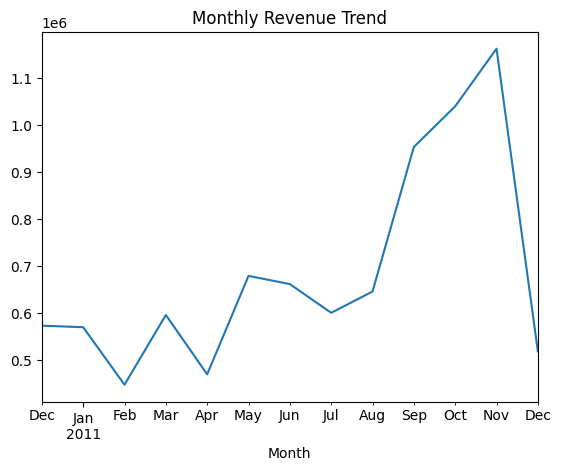

In [ ]:
#Time-Based Trends
#Monthly Revenue
sales_df['Month'] = sales_df['InvoiceDate'].dt.to_period('M')

monthly_revenue = (
    sales_df
    .groupby('Month')['Revenue']
    .sum()
)
monthly_revenue.plot(title='Monthly Revenue Trend')


## Key Insights

- The majority of revenue is generated from customers in the United Kingdom, indicating geographic concentration.
- A small subset of products contributes disproportionately to total revenue.
- Sales exhibit clear seasonal patterns, with peaks during certain months.
- Customer-level data enables further segmentation and retention analysis.


## Business Recommendations

- Diversify market focus by targeting high-potential international regions.
- Prioritize inventory and marketing efforts around top-performing products.
- Leverage seasonal trends to optimize promotional campaigns and stock planning.
- Develop customer retention strategies based on repeat purchasing behavior.
